In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Dropout
from keras.optimizers import Adam

In [2]:
## Generating the Data

x_train = np.linspace(-1,1,20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])
x_test = np.linspace(-1,1,20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

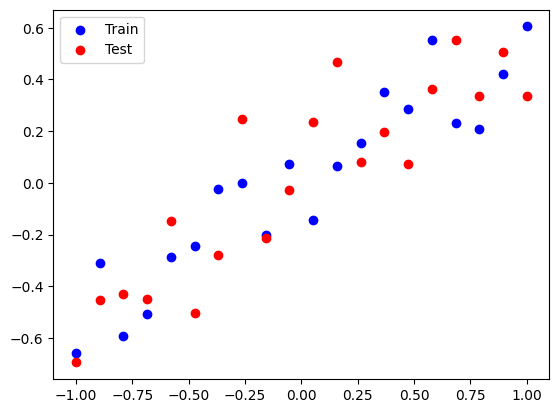

In [3]:
# Ploting the Data

plt.scatter(x_train, y_train , color = 'b', label = 'Train')
plt.scatter(x_test, y_test , color = 'r', label = 'Test')
plt.legend()
plt.show()

In [ ]:
## It shows a kind of linear relation between x and y

## Building Regression ANN

In [4]:
model = Sequential()
model.add(Dense(128, activation ='relu', input_dim= 1))
model.add(Dense(128, activation = 'relu' ))
model.add(Dense(1,activation = 'linear'))

adam = Adam(learning_rate= 0.01)
model.compile(optimizer = 'adam', loss='mse', metrics = ['mse'])
history = model.fit(x_train, y_train , epochs =500 , validation_data = (x_test,y_test))

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 0.1215 - mse: 0.1215 - val_loss: 0.1116 - val_mse: 0.1116
Epoch 2/500
1/1 [==============================] - 0s 66ms/step - loss: 0.1004 - mse: 0.1004 - val_loss: 0.0928 - val_mse: 0.0928
Epoch 3/500
1/1 [==============================] - 0s 68ms/step - loss: 0.0821 - mse: 0.0821 - val_loss: 0.0771 - val_mse: 0.0771
Epoch 4/500
1/1 [==============================] - 0s 60ms/step - loss: 0.0667 - mse: 0.0667 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 5/500
1/1 [==============================] - 0s 68ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 6/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 7/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 8/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0298 - mse: 0.0298

In [5]:
# Evaluating the model

_, train_mse = model.evaluate(x_train,y_train, verbose=0)
_, test_mse = model.evaluate(x_test,y_test, verbose=0)
print(f'Testing MSE : {test_mse}, Training MSE : {train_mse}')

Testing MSE : 0.03563086315989494, Training MSE : 0.010260467417538166


In [6]:
## If we can see that we have a differnece of 20%

In [7]:
# Prediction

y_pred = model.predict(x_test)

1/1 [==============================] - 0s 71ms/step


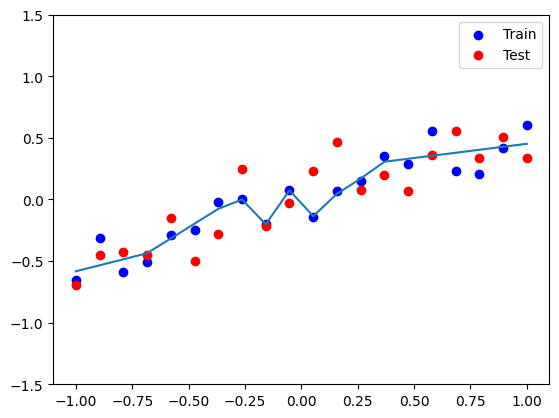

In [10]:
## Visualization

plt.figure()
plt.scatter(x_train, y_train , color = 'b', label = 'Train')
plt.scatter(x_test, y_test , color = 'r', label = 'Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

In [11]:
## As we observe that the curve capture the unlining pattern for training data more as compare to resting data.
## That means it a case of overfitting


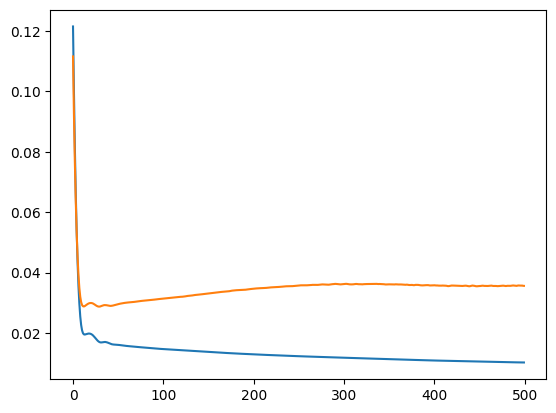

In [12]:
## VIsualiszation for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

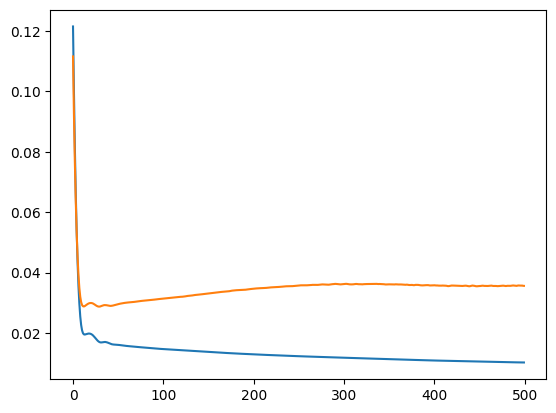

In [13]:
## VIsualiszation for MSE

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

In [14]:
## As both the curves are similar and there is gap between then so clearly its a case of overfitting

## Building ANN Regression Model using Dropout

In [17]:
model = Sequential()
model.add(Dense(128, activation ='relu', input_dim= 1))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu' ))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'linear'))

adam = Adam(learning_rate= 0.01)
model.compile(optimizer = 'adam', loss='mse', metrics = ['mse'])
history = model.fit(x_train, y_train , epochs =500 , validation_data = (x_test,y_test))

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.1495 - mse: 0.1495 - val_loss: 0.1497 - val_mse: 0.1497
Epoch 2/500
1/1 [==============================] - 0s 33ms/step - loss: 0.1378 - mse: 0.1378 - val_loss: 0.1248 - val_mse: 0.1248
Epoch 3/500
1/1 [==============================] - 0s 31ms/step - loss: 0.1045 - mse: 0.1045 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 4/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0858 - mse: 0.0858 - val_loss: 0.0851 - val_mse: 0.0851
Epoch 5/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0647 - mse: 0.0647 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 7/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 8/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0374 - mse: 0.0374

In [18]:
# Evaluating the model

_, train_mse = model.evaluate(x_train,y_train, verbose=0)
_, test_mse = model.evaluate(x_test,y_test, verbose=0)
print(f'Testing MSE : {test_mse}, Training MSE : {train_mse}')

Testing MSE : 0.034114494919776917, Training MSE : 0.013661961071193218


In [19]:
# Prediction

y_pred = model.predict(x_test)

1/1 [==============================] - 0s 55ms/step


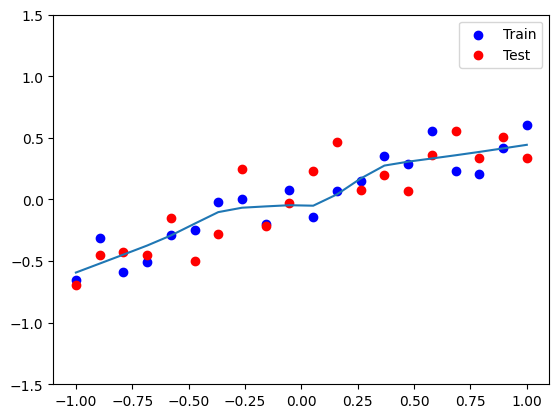

In [20]:
## Visualization

plt.figure()
plt.scatter(x_train, y_train , color = 'b', label = 'Train')
plt.scatter(x_test, y_test , color = 'r', label = 'Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

In [21]:
## Curve become smoother rather than spiky

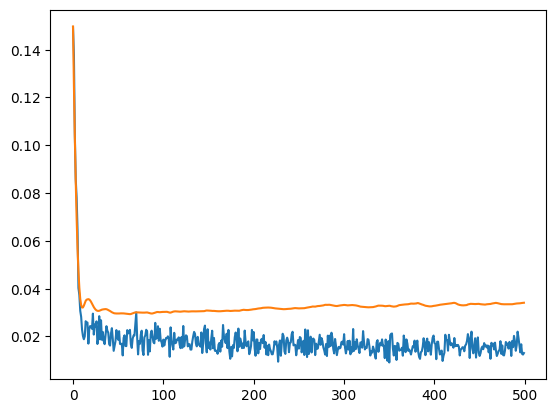

In [22]:
## Visualiszation for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

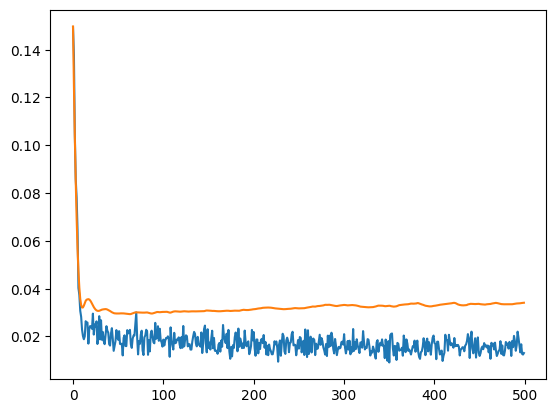

In [23]:
## Visualiszation for MSE

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

In [ ]:
## So the Gap between both the curvs reduce hence problem of overfitting gets reduced

In [24]:
## Lets follow same technique with drop out percentage 0.5

model = Sequential()
model.add(Dense(128, activation ='relu', input_dim= 1))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu' ))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'linear'))

adam = Adam(learning_rate= 0.01)
model.compile(optimizer = 'adam', loss='mse', metrics = ['mse'])
history = model.fit(x_train, y_train , epochs =500 , validation_data = (x_test,y_test), verbose=0)

In [25]:
# Evaluating the model

_, train_mse = model.evaluate(x_train,y_train, verbose=0)
_, test_mse = model.evaluate(x_test,y_test, verbose=0)
print(f'Testing MSE : {test_mse}, Training MSE : {train_mse}')

Testing MSE : 0.03137359768152237, Training MSE : 0.015336146578192711


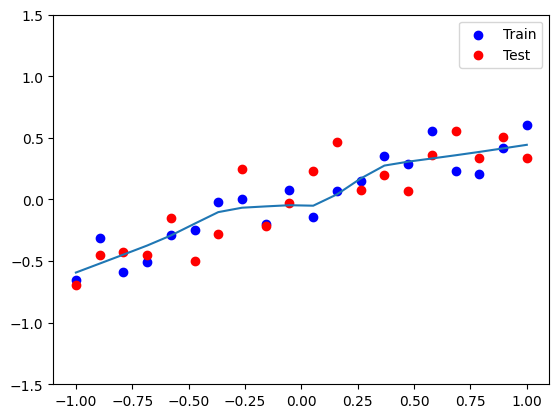

In [26]:
## Visualization

plt.figure()
plt.scatter(x_train, y_train , color = 'b', label = 'Train')
plt.scatter(x_test, y_test , color = 'r', label = 'Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

In [27]:
## Curve become more smoother

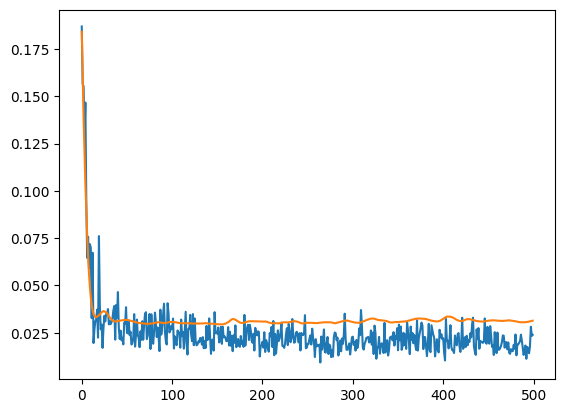

In [28]:
## Visualiszation for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

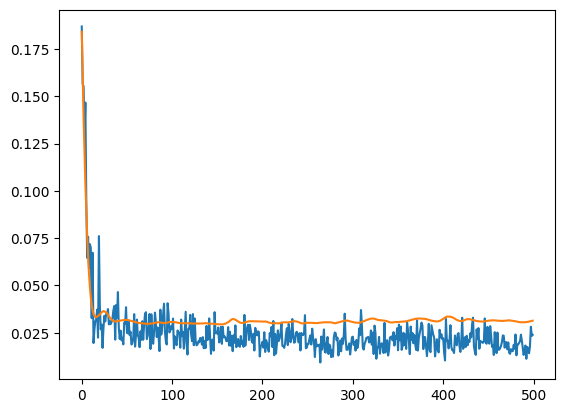

In [29]:
## Visualiszation for MSE

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

In [ ]:
## Difference has been reduced drastically between both curves hence over fillting issue is resolved.